In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Node:
    
    def __init__(self, node_id, depth = None, child = None, parent = None, loc = None):
        self.id = node_id
        self.depth = depth
        self.state = None
        self.children = child
        self.parent = parent
        self.location = loc

class Noisy_Tree:
    
    def __init__(self, seed_nodes):
        
        self.seed_nodes = seed_nodes
        self.size = len(seed_nodes)## seed nodes and the root node
        
        self.root = Node(-1)
        self.root.depth = 0
        self.root.location = (0,0,0)
        self.root.parent = None
        self.root.children = self.seed_nodes
        
        
        for j,e in enumerate(self.seed_nodes):
            e.depth = 1
            e.location = (e.depth, np.sin(e.id*(1/(self.size))*2*np.pi), np.cos(e.id*(1/(self.size)*2*np.pi)))
            e.parent = self.root
            e.children = None
            
        self.nodes = seed_nodes
        self.leaf = seed_nodes
        self.height = 1
        
    def make_tree(self, height, branching_constant):
        new_branch = []
        for i in range(height):
            node_id = 0
            
            for j,f in enumerate(self.leaf):
                node_id = j * branching_constant
                new_branch = [Node(node_id + k, 
                                   depth = 2 + i, 
                                   parent = f, 
                                   loc = (2 + i, 
                                          np.sin((node_id + k)*(1/(branching_constant*len(self.leaf)))*2*np.pi), 
                                          np.cos((node_id + k)*(1/(branching_constant*len(self.leaf)))*2*np.pi)))  
                              for k in range(branching_constant)]
                
                f.children = new_branch
                self.nodes = self.nodes + new_branch
                
            self.leaf_update()
                
        self.size = len(self.nodes)
        self.height = 1 + height
        
        return(None)
        
    def leaf_update(self):
        leaves = []
        
        for i,e in enumerate(self.nodes):
            if e.children == None: leaves.append(e)
        self.leaf = leaves
        
        return(None)
    
    def get_generations(self, n):
        nth_generation = []
        for i,e in enumerate(self.nodes):
            if e.depth == n: nth_generation.append(e)
        return(nth_generation)

In [3]:
nodes = []
seed = 5
for j in range(seed):
    nodes.append(Node(j))
NT3 = Noisy_Tree(nodes)
NT5 = Noisy_Tree(nodes)

In [4]:
NT3.make_tree(2,3)
NT5.make_tree(2,5)

Text(0.5, 1.0, '5-Branching Tree')

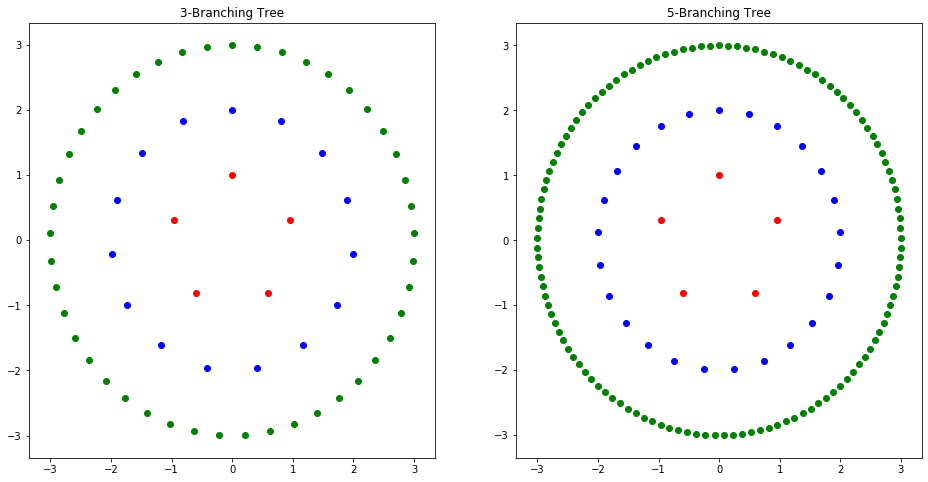

In [5]:
fig,ax = plt.subplots(1,2,figsize = (16,8))
layer_colors = {'1':'r', '2':'b', '3':'g', '4':'black', '5':'purple'}
for i in range(NT3.size):
    ax[0].scatter(NT3.nodes[i].location[0]*NT3.nodes[i].location[1],
                  NT3.nodes[i].location[0]*NT3.nodes[i].location[2], 
                  c =layer_colors['%d'%NT3.nodes[i].location[0]])
    
for i in range(NT5.size):
    ax[1].scatter(NT5.nodes[i].location[0]*NT5.nodes[i].location[1],
                  NT5.nodes[i].location[0]*NT5.nodes[i].location[2], 
                  c =layer_colors['%d'%NT5.nodes[i].location[0]])
ax[0].set_title('3-Branching Tree')
ax[1].set_title('5-Branching Tree')

In [27]:
NTG = nx.DiGraph()
NTG.add_edges_from([(1,2),(2,5),(2,3),(5,9)])

In [21]:
for i in range(1,NT3.height):
    for j,e in enumerate(NT3.get_generations(i)):
        print([(e.id, e.children[k].id) for k in range(len(e.children))])

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
[(1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
[(2, 10), (2, 11), (2, 12), (2, 13), (2, 14)]
[(3, 15), (3, 16), (3, 17), (3, 18), (3, 19)]
[(4, 20), (4, 21), (4, 22), (4, 23), (4, 24)]
[(0, 0), (0, 1), (0, 2)]
[(1, 3), (1, 4), (1, 5)]
[(2, 6), (2, 7), (2, 8)]
[(3, 9), (3, 10), (3, 11)]
[(4, 12), (4, 13), (4, 14)]
[(5, 15), (5, 16), (5, 17)]
[(6, 18), (6, 19), (6, 20)]
[(7, 21), (7, 22), (7, 23)]
[(8, 24), (8, 25), (8, 26)]
[(9, 27), (9, 28), (9, 29)]
[(10, 30), (10, 31), (10, 32)]
[(11, 33), (11, 34), (11, 35)]
[(12, 36), (12, 37), (12, 38)]
[(13, 39), (13, 40), (13, 41)]
[(14, 42), (14, 43), (14, 44)]


In [14]:
for i,e in enumerate(NT3.get_generations(1)):
    print(e)

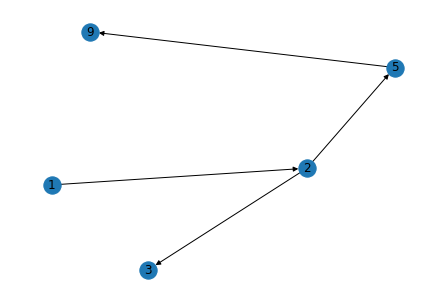

In [28]:
nx.draw(NTG,with_labels = True)

In [13]:
NT3.get_generations(0)

[]